<a href="https://colab.research.google.com/github/HarshCasper/Brihaspati/blob/master/Iris/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Importing Libraries ** 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Rows : 150
Columns : 5


In [8]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [12]:
df['variety'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


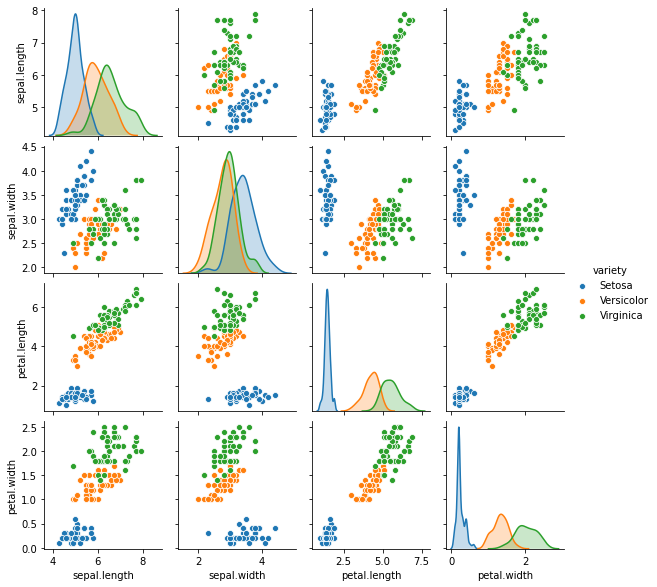

In [14]:
sns.pairplot(df,hue='variety',size=2)

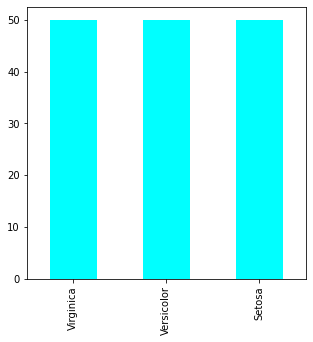

In [15]:
df['variety'].value_counts().plot.bar(color = 'cyan', figsize = (5, 5))

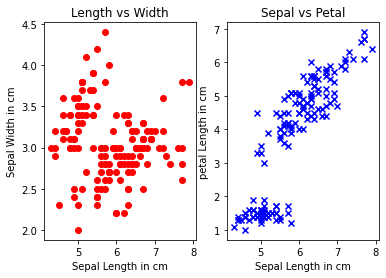

In [17]:
plt.subplot(1, 2, 1)
plt.scatter(x = df['sepal.length'], y = df['sepal.width'], color = 'red', marker = 'o',)
plt.title('Length vs Width')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')

plt.subplot(1, 2, 2)
plt.scatter(x = df['sepal.length'], y = df['petal.length'], color = 'blue', marker = 'x',)
plt.title('Sepal vs Petal')
plt.xlabel('Sepal Length in cm')
plt.ylabel('petal Length in cm')
plt.show()


In [19]:
input_features = list(df.columns)
print(input_features)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']


In [20]:
input_features.remove('variety')
print(input_features)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [22]:
X = df.drop(columns = ['variety'])
y = df['variety']

print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (150, 4)
y shape :  (150,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("X train shape : ", X_train.shape)
print("X test shape : ", X_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

X train shape :  (120, 4)
X test shape :  (30, 4)
y train shape :  (120,)
y test shape :  (30,)


In [24]:
# scaling the values between 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print("minimum value : ", np.min(X_train))
print("maximum value : ", np.max(X_train))

minimum value :  0.0
maximum value :  1.0


**Using Machine Learning to solve the Iris Dataset**

**Logistic Regression**

In [34]:
model = LogisticRegression(C = 1000, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 0.9833333333333333
testing accuracy : 1.0


**Support Vector Classifier**

In [32]:
model = SVC()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 0.9583333333333334
testing accuracy : 1.0


**Decision Tree**

In [31]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test ,y_test))

training accuracy : 1.0
testing accuracy : 1.0


**Random Forest**

In [33]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 1.0
testing accuracy : 0.9666666666666667


**Using Deep Learning (Neural Networks) to solve Iris Dataset**

**Importing the libraries**

In [36]:
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import seaborn as sns

**Multi Layer Perceptron**

In [37]:
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 0.9583333333333334
testing accuracy : 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# The above method is not commonly used. 
keras is the most popular deep learning library.